* 커널 기법
    * 많은 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커진다.
    * 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리 (정확하는 스칼라 곱)를 계산.
    * 데이터를 고차원 공간에 매핑하는 데 많이 사용하는 방법
        * 다항식 커널
            * 원래 특성의 가능한 조합을 지정된 지정된 차수까지 모두 계산
        * 가우시안(Gaussian) 커널 / RBF(radial basis function) 커널
            * 차원이 무한한 특성 공간에 매핑하는 것.
            * 모든 차수의 모든 다항식을 고려

* SVM 이해하기
    * 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 준다.
        * 두 클래스 사이의 경계에 위치한 데이터 포인트들.
        * 이런 데이터 포인트를 **서포트 벡터(support vector)**
    * 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정.
    * 분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련 과정에서 학습
    * 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산.
        * $k_{rbf}(x_1, x_2) = \exp(-\gamma||x_1-X_2||^2)$
        * $x_1, x_2$는 데이터 포인트, $||x_1-x_2||$는 유클리디안 거리, $\gamma$는 가우시안 터날의 폭을 제어하는 매개변수.

Text(0, 0.5, 'feature 1')

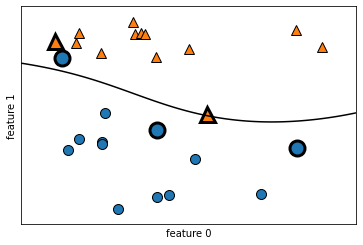

In [2]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블 결정.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

* SVM 매개변수 튜닝
    * gamma - 가우시안 커널 폭의 역수.
        * 하나의 훈련 샘플이 미치는 영향의 범위 결정.
        * gamma 값이 작을수록 데이터 포인트의 영향 범위가 커짐.
    * C - 규제 매개변수.
        * 각 포인트의 중요도 (정확히는 dual_coef_ 값) 제한.

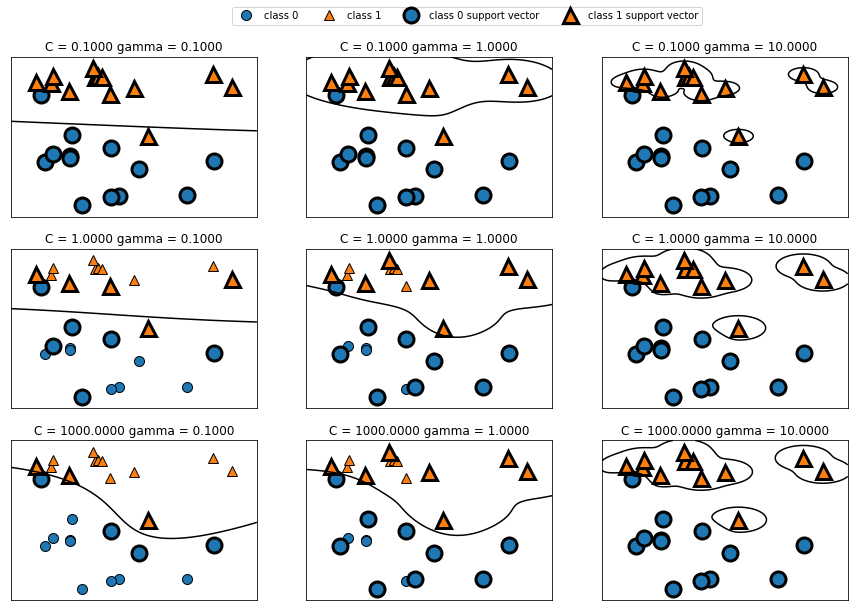

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(['class 0', 'class 1', 'class 0 support vector', 'class 1 support vector'], ncol=4, loc=(.9, 1.2))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

svc = SVC()
svc.fit(X_train, y_train)

print('train set acc: {:.3f}'.format(svc.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(svc.score(X_test, y_test)))

train set acc: 0.904
test set acc: 0.937


Text(0, 0.5, 'feature')

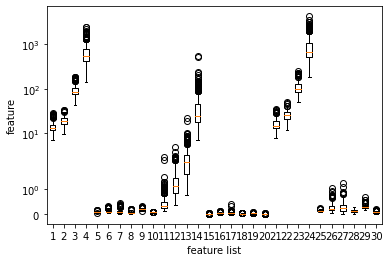

In [6]:
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('feature list')
plt.ylabel('feature')

* SVM을 위한 데이터 전처리
    * 모든 특성 값을 평균이 0이고 단위 분산이 되도록 하거나
    * 0과 1 사이로 맞추는 방법을 많이 사용.
    * StandardScaler, MinMaxScaler
    * 데이터셋의 성질에 따라 다르다.

In [7]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print('feature min\n{}'.format(X_train_scaled.min(axis=0)))
print('feature max\n{}'.format(X_train_scaled.max(axis=0)))

feature min
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
feature max
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [9]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('train set acc: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('test set acc: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

train set acc: 0.984
test set acc: 0.972


In [10]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)
print('train set acc: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('test set acc: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

train set acc: 0.988
test set acc: 0.979


* 장던점과 매개변수
    * 다양한 데이터셋에서 잘 작동.
    * 저차원과 고차원의 데이터에 모두 잘 작동.
    * 샘플이 많을 때는 잘 맞지 않음.
    * 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다.
    * 분석하기 어렵다.

### 신경망(딥러닝)
* 다층 퍼셉트론 (multilayer perceptrons, MLP)

* 신경망 모델

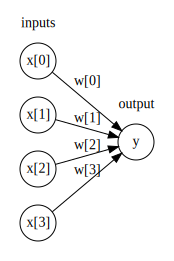

In [11]:
mglearn.plots.plot_logistic_regression_graph()

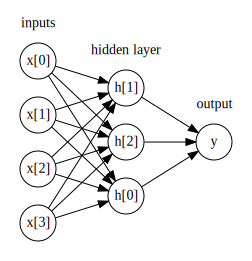

In [12]:
mglearn.plots.plot_single_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x)')

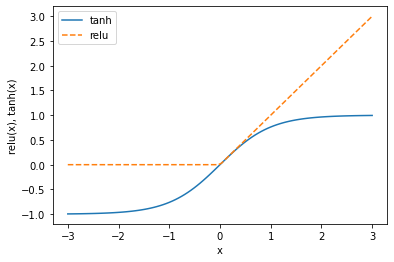

In [13]:
import numpy as np

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

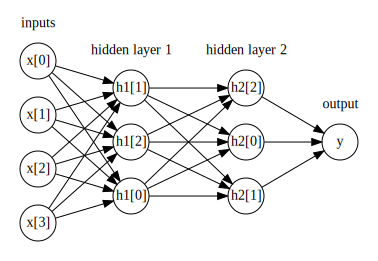

In [14]:
mglearn.plots.plot_two_hidden_layer_graph()

* 신경망 튜닝

Text(0, 0.5, 'feature 1')

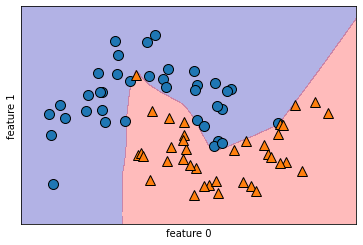

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=42
)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

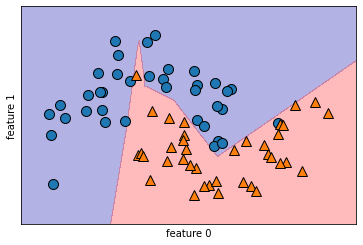

In [18]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

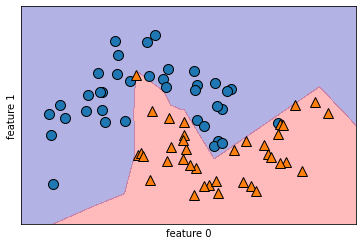

In [19]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

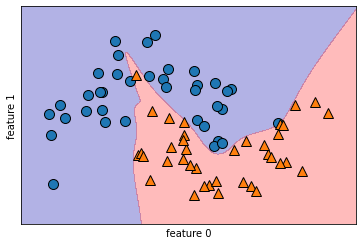

In [20]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

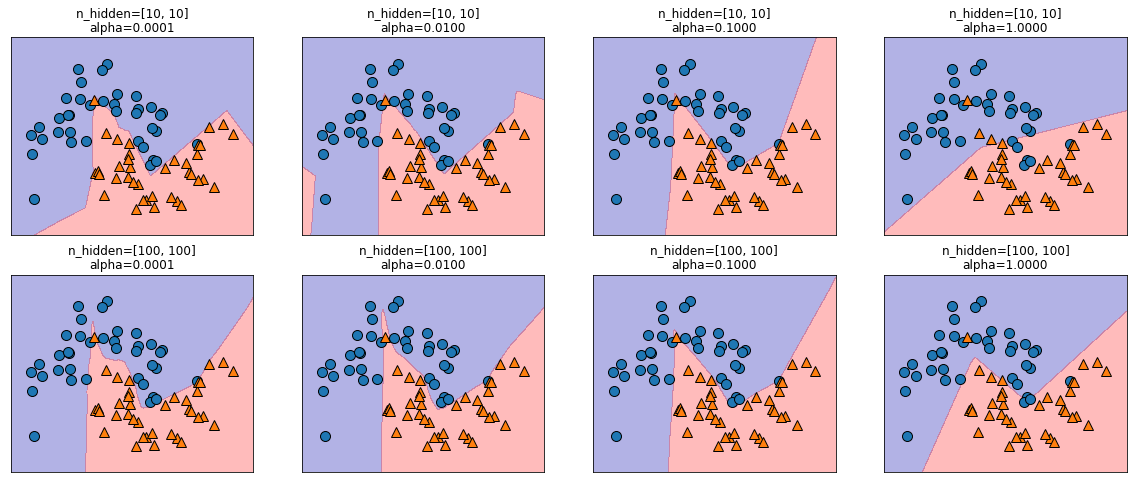

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(
            n_hidden_nodes, n_hidden_nodes, alpha
        ))

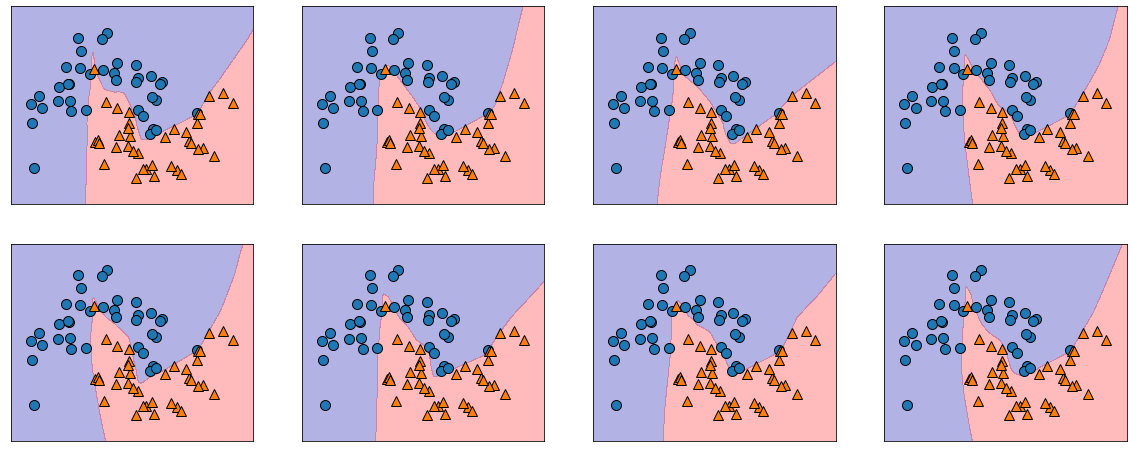

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [23]:
print('cancer data feature max:\n{}'.format(cancer.data.max(axis=0)))

cancer data feature max:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    random_state=0
)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('train set acc: {:.3f}'.format(mlp.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(mlp.score(X_test, y_test)))

train set acc: 0.939
test set acc: 0.916


In [26]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print('train set acc: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('test set acc: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

train set acc: 0.991
test set acc: 0.965


c:\Users\posky\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('train set acc: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('test set acc: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

train set acc: 1.000
test set acc: 0.972


In [31]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('train set acc: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('test set acc: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

train set acc: 0.988
test set acc: 0.972


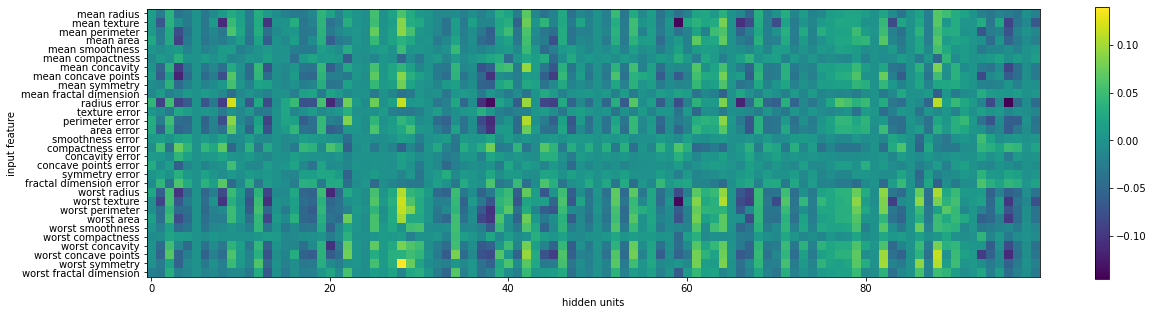

In [32]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('hidden units')
plt.ylabel('input feature')
plt.colorbar()

* 장단점과 매개변수
    * 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다.
    * 종종 학습이 오래 걸린다.
    * 데이터 전처리에 주의.

* 신경망의 복잡도 추정
    * 은닉층의 개수, 각 은닉층의 유닛 수
    * 도움이 될만한 측정치 - 학습된 가중치 또는 계수의 수